#### Importing Libraries

In [1]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

#### Importing Data

In [2]:
df = pd.read_csv(r'Telecoms Company data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Cleaning

In [3]:
# Checking for nulls in dataframe

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Notice that the TotalCharges field is an object, we should convert it to a numeric dtype.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [5]:
# Notice that SeniorCitizen is an int64 dtype, we can make it a categorical variable.
# But first, let's check the distinct values

df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [6]:
# converting to a categorical variable
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


#### Feature Engineering

In [7]:
# Firstly, Lets create a new feature that is a ratio of MonthlyCharges to TotalCharges

df['MonthlyChargeRatio'] = round(df['MonthlyCharges']/df['TotalCharges'], 2)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRatio
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.00
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.03
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.50
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.02
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.47


In [8]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [9]:
# Secondly, Let's drop some features
# customerID provides no predictive value to the model so we would drop that.
# Since we have a new feature called MonthlyChargeRatio which would correlate highly to MorningCharges. So to prevent multicolinearity with our features, we would drop MonthlyCharges

data = df.drop(['customerID', 'MonthlyCharges'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7043 non-null   object 
 1   SeniorCitizen       7043 non-null   object 
 2   Partner             7043 non-null   object 
 3   Dependents          7043 non-null   object 
 4   tenure              7043 non-null   int64  
 5   PhoneService        7043 non-null   object 
 6   MultipleLines       7043 non-null   object 
 7   InternetService     7043 non-null   object 
 8   OnlineSecurity      7043 non-null   object 
 9   OnlineBackup        7043 non-null   object 
 10  DeviceProtection    7043 non-null   object 
 11  TechSupport         7043 non-null   object 
 12  StreamingTV         7043 non-null   object 
 13  StreamingMovies     7043 non-null   object 
 14  Contract            7043 non-null   object 
 15  PaperlessBilling    7043 non-null   object 
 16  Paymen

In [10]:
# Let us drop the null rows
data = data.dropna()
data.shape

(7032, 20)

#### Data Exploration and Visualization

In [11]:
# First, let's split our features into numerical and categorical features

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_df = df[numerical_features]

categorical_features = data.select_dtypes(include=['object']).columns
categorical_df = df[categorical_features]

categorical_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


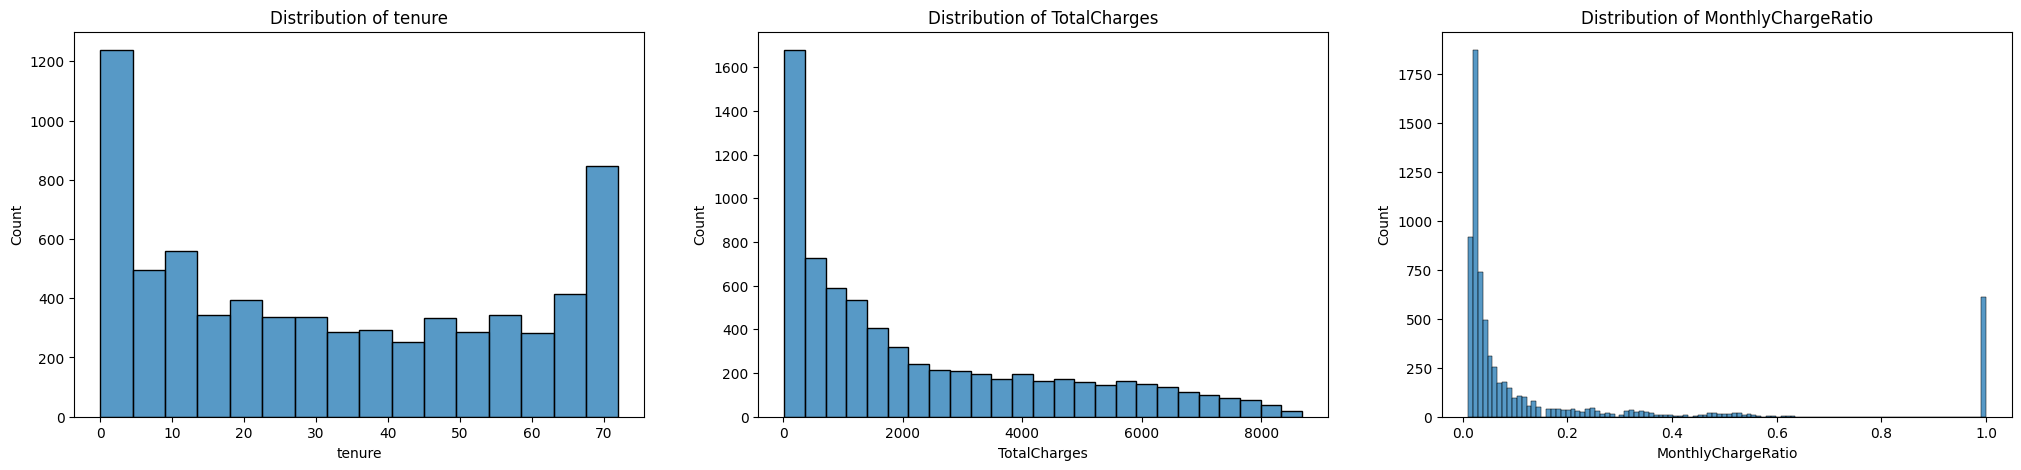

In [12]:
# Next, 
fig, axes = plt.subplots(
    nrows=1, 
    ncols=3, 
    figsize=(25, 5)
)

fig.subplots_adjust(hspace=0.5)

for ax, column in zip(axes.flatten(), numerical_df.columns):
    sns.histplot(numerical_df[column], ax = ax)
    ax.set_title(f"Distribution of {column}")

plt.show()

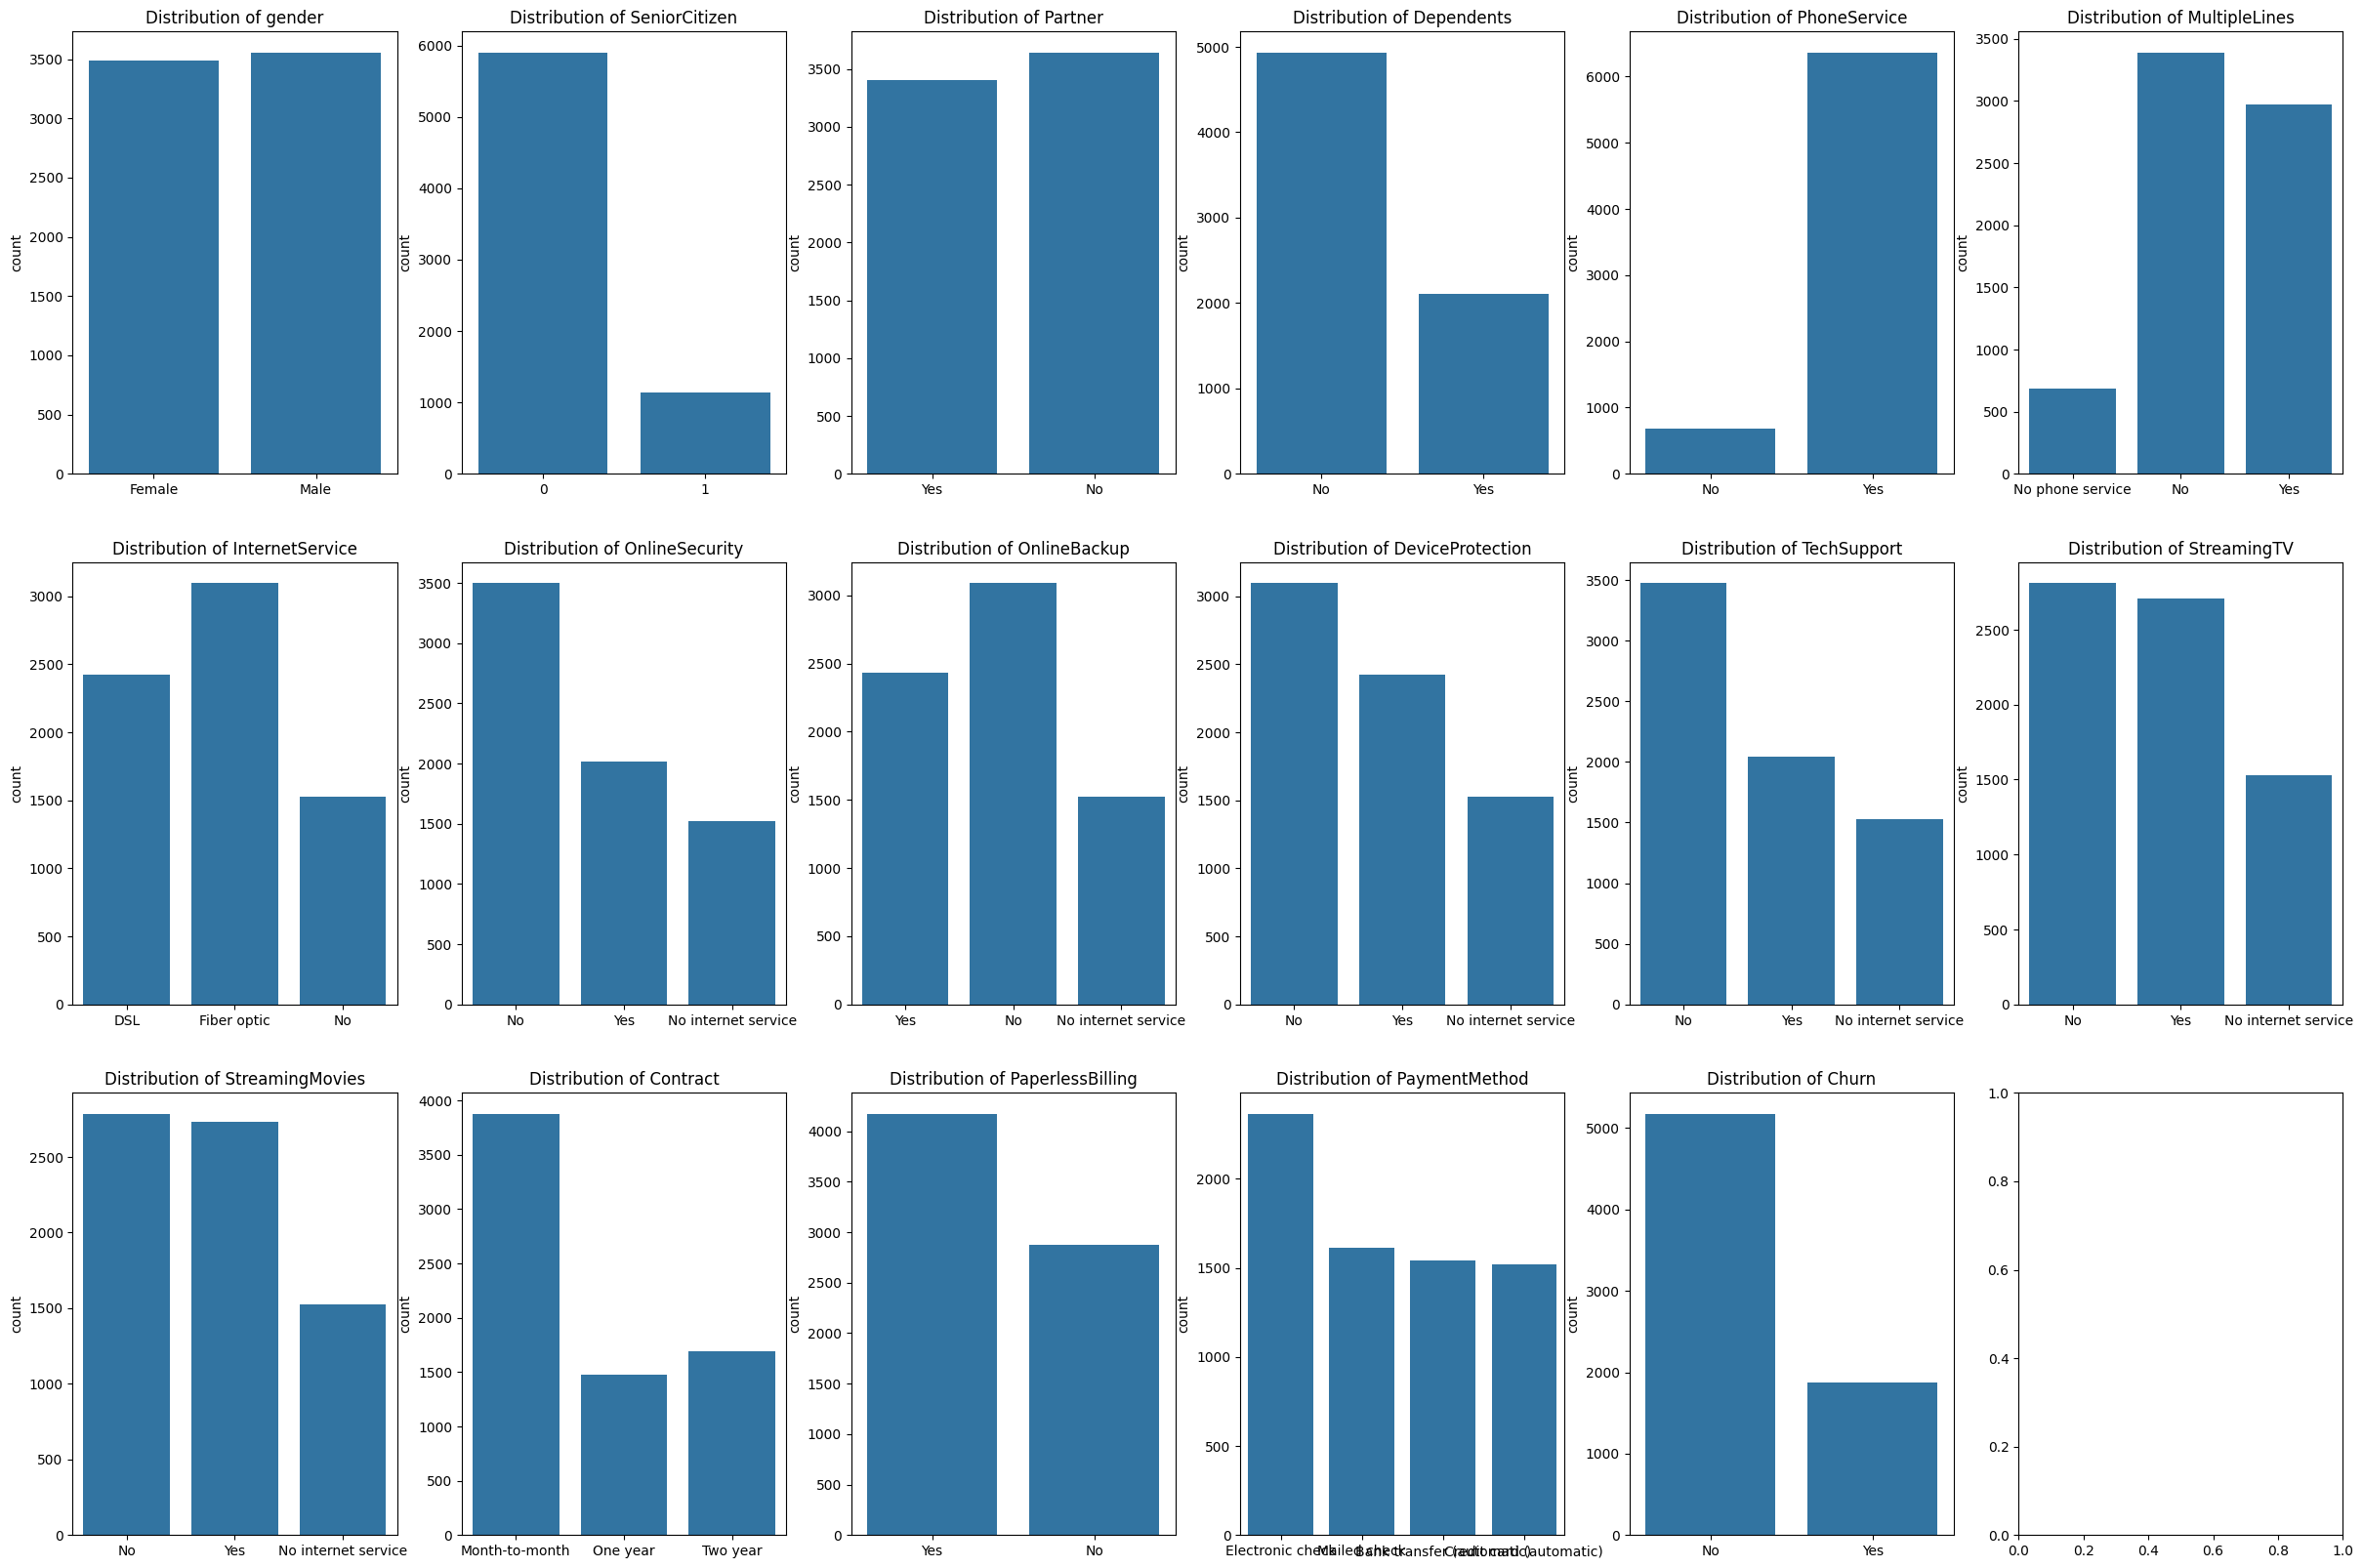

In [13]:
# Assuming df_categorical is your DataFrame containing categorical features
fig, axes = plt.subplots(
    nrows=3, 
    ncols=6, 
    figsize=(30, 20)
)
fig.subplots_adjust(hspace=0.2)

for ax, column in zip(axes.flatten(), categorical_df.columns):
    # Bar plot
    sns.countplot(x=column, data=categorical_df, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')  # Hiding x-axis label
    
    # # Pie chart as an inset
    # inset_ax = ax.inset_axes([0.6, 0.6, 0.35, 0.35])
    # categorical_df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=inset_ax)
    # inset_ax.set_title(f'{column} Pie Chart')

plt.show()

In [14]:
# We can see that SeniorCitizen and PhoneServices are very imbalalnced
# We want to remove imbalanced features as much as possible as their presence can lead to biased models that are less accurate in predicting outcomes for the underrepresented categories.

data = data.drop(['SeniorCitizen', 'PhoneService'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7032 non-null   object 
 1   Partner             7032 non-null   object 
 2   Dependents          7032 non-null   object 
 3   tenure              7032 non-null   int64  
 4   MultipleLines       7032 non-null   object 
 5   InternetService     7032 non-null   object 
 6   OnlineSecurity      7032 non-null   object 
 7   OnlineBackup        7032 non-null   object 
 8   DeviceProtection    7032 non-null   object 
 9   TechSupport         7032 non-null   object 
 10  StreamingTV         7032 non-null   object 
 11  StreamingMovies     7032 non-null   object 
 12  Contract            7032 non-null   object 
 13  PaperlessBilling    7032 non-null   object 
 14  PaymentMethod       7032 non-null   object 
 15  TotalCharges        7032 non-null   float64
 16  Churn      

In [15]:
# For binary categories, we will use label encoding
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [16]:
# We will use one-hot encoding for categorical variables with more than 2 categories.

data = pd.get_dummies(data, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MultipleLines'], drop_first=True)

In [17]:
data.head()

,gender,Partner,Dependents,tenure,PaperlessBilling,TotalCharges,Churn,MonthlyChargeRatio,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0,1,1,29.85,0,1.00,False,False,...,False,False,False,False,False,False,True,False,True,False
1,1,0,0,34,0,1889.50,0,0.03,False,False,...,False,False,False,True,False,False,False,True,False,False
2,1,0,0,2,1,108.15,1,0.50,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,0,0,45,0,1840.75,0,0.02,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0,0,0,2,1,151.65,1,0.47,True,False,...,False,False,False,False,False,False,True,False,False,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PaperlessBilling                       7032 non-null   int64  
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   MonthlyChargeRatio                     7032 non-null   float64
 8   InternetService_Fiber optic            7032 non-null   bool   
 9   InternetService_No                     7032 non-null   bool   
 10  OnlineSecurity_No internet service     7032 non-null   bool   
 11  OnlineSec

#### Model Selection

In [19]:
# First, lets split our data into target and features

X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [20]:
# Now, let us split into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Now, let us define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Also, we will initiate an empty dataframe to store our metrics
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Then, we will loop through the models to train, make predictions, and calculate the metrics
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    # Print out the metrics
    print(f"\nMetrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

    # create dictionary with results
    results_dict = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Store metrics in results_df
    results_df = -pd.concat([results_df, pd.DataFrame([results_dict])], ignore_index=True) 
    # as at new release of pandas, the append function has been removed

# # Print out results dataframe
# print("\nMetrics Comparison")
# print(results_df)
results_df


Metrics for Logistic Regression:
Accuracy: 0.7896233120113717
Precision: 0.63
Recall: 0.5053475935828877
F1: 0.5608308605341247

Metrics for Random Forest:
Accuracy: 0.7803837953091685
Precision: 0.6156583629893239
Recall: 0.4625668449197861
F1: 0.5282442748091604

Metrics for Gradient Boosting:
Accuracy: 0.7874911158493249
Precision: 0.6237623762376238
Recall: 0.5053475935828877
F1: 0.5583456425406204


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.789623,0.630000,0.505348,0.560831
1,Random Forest,0.780384,0.615658,0.462567,0.528244
2,Gradient Boosting,0.787491,0.623762,0.505348,0.558346


In [26]:
# Interpretations
# Accuracy: Represents the overall correctness of the model. While all models have decent accuracy, it may not be the most informative metric, especially in imbalanced datasets.
# Precision: Indicates the proportion of positive identifications that were actually correct. In the context of churn prediction, it represents the accuracy of the model in identifying customers who will churn. A higher precision means fewer false positives
# Recall (Sensitivity): Measures the proportion of actual positives that were correctly identified by the model. In the context of churn prediction, it represents the ability to capture all customers who actually churned.
# F1 Score: A balance between precision and recall. It's the harmonic mean of precision and recall. A higher F1 score indicates a better balance between precision and recall.

# Our scores are not too impressive, so we would have to perform some improvement operations


#### Model Improvements

<Axes: xlabel='Churn'>

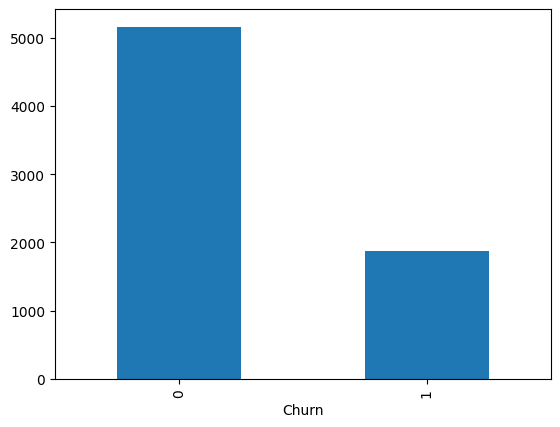

In [28]:
# First, there is a huge imbalance in target.

data['Churn'].value_counts().plot(kind = 'bar')

In [30]:
# we will use an oversampling technoque called SMOTE to address imbalance
from imblearn.over_sampling import SMOTE

# Applying SMOTE to training set
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [32]:
# we will initiate an empty dataframe to store our metrics
results_df_smote = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Then, we will loop through the models to train, make predictions, and calculate the metrics
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_smote, y_train_smote)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    # Print out the metrics
    print(f"\nMetrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

    # create dictionary with results
    results_dict_smote = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Store metrics in results_df
    results_df_smote = pd.concat([results_df_smote, pd.DataFrame([results_dict_smote])], ignore_index=True) 
    # as at new release of pandas, the append function has been removed

# # Print out results dataframe
# print("\nMetrics Comparison")
# print(results_df)
results_df_smote


Metrics for Logistic Regression:
Accuracy: 0.7547974413646056
Precision: 0.5327313769751693
Recall: 0.6310160427807486
F1: 0.5777233782129743

Metrics for Random Forest:
Accuracy: 0.7683013503909026
Precision: 0.5662983425414365
Recall: 0.5481283422459893
F1: 0.5570652173913044

Metrics for Gradient Boosting:
Accuracy: 0.7569296375266524
Precision: 0.5358744394618834
Recall: 0.6390374331550802
F1: 0.5829268292682926


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.754797,0.532731,0.631016,0.577723
1,Random Forest,0.768301,0.566298,0.548128,0.557065
2,Gradient Boosting,0.756930,0.535874,0.639037,0.582927


In [1]:
# this is not real code. we are testing PRs
print('this is real')

this is real


In [2]:
print('Another branch')

Another branch


In [3]:
# Overbalancing didnt seem to do much for the model, so we will try out Ensemble methods which basically just combine the prediction of multiple models to improve overall performance
# We will use voting classifier, which combines prediction of multiple classifiers and predicts the class that recieves majority of the votes

from sklearn.ensemble import VotingClassifier